In [1]:
import numpy as np
from matplotlib import pyplot as plt


data = None
with open('NP0029_20150731085611_Raw.txt', 'r', encoding='utf-8') as f:
    data = f.read()
data = np.array(data.replace('\n', '').split(',')[:-1]).reshape(-1, 5)

print(data)

[['0000000002' '27' '34' '44' '083']
 ['0000000003' '27' '34' '44' '084']
 ['0000000004' '27' '34' '44' '083']
 ...
 ['0000001138' '27' '34' '44' '067']
 ['0000001139' '27' '34' '44' '069']
 ['0000001140' '27' '34' '44' '067']]


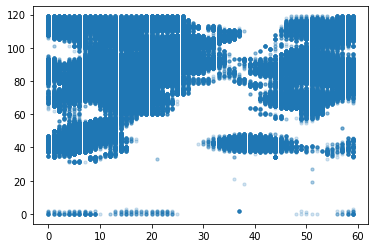

In [2]:
positions = data[:, 2:4].astype(np.int)
plt.scatter(positions[:, 1], positions[:, 0], alpha=0.2, s=10)

In [3]:
import pandas as pd

int_data = data.astype(np.int)
time_and_pressure = np.column_stack((int_data[:, 0], int_data[:, -1]))

df = pd.DataFrame(time_and_pressure)\
       .groupby(by=0, as_index=False)\
       .sum()

time_and_pressure_sum = df.values[:, :]
print(time_and_pressure_sum)

[[   2   83]
 [   3   84]
 [   4   83]
 ...
 [1138   67]
 [1139   69]
 [1140   67]]


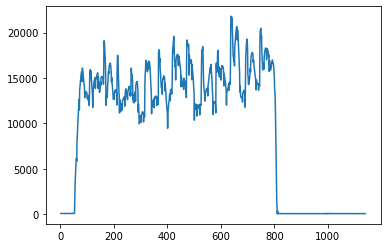

In [4]:
plt.plot(time_and_pressure_sum[:, 0].tolist(), time_and_pressure_sum[:, 1].tolist())

In [5]:
df1 = pd.DataFrame(time_and_pressure)\
        .groupby(by=0, as_index=False)\
        .sum()
df2 = pd.DataFrame(time_and_pressure)\
        .groupby(by=0, as_index=False)\
        .count()

time_and_pressure_mean = np.column_stack((df1.values[:, 0], df1.values[:, 1] / df2.values[:, 1]))
print(time_and_pressure_mean)

[[   2.   83.]
 [   3.   84.]
 [   4.   83.]
 ...
 [1138.   67.]
 [1139.   69.]
 [1140.   67.]]


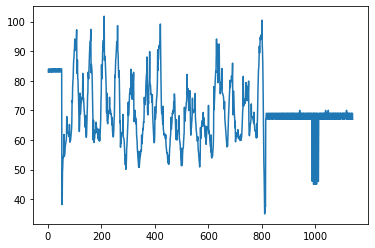

In [6]:
plt.plot(time_and_pressure_mean[:, 0].tolist(), time_and_pressure_mean[:, 1].tolist())

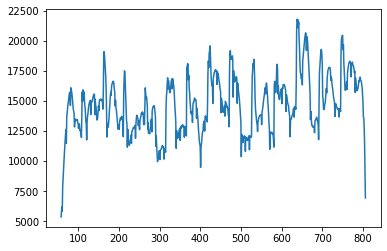

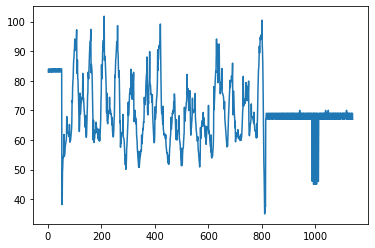

In [7]:
tps_filtered = time_and_pressure_sum[time_and_pressure_sum[:, 1] > 5000]
tpm_filtered = time_and_pressure_mean[time_and_pressure_mean[:, 1] > 30]
plt.plot(tps_filtered[:, 0].tolist(), tps_filtered[:, 1].tolist())
plt.show()
plt.plot(tpm_filtered[:, 0].tolist(), tpm_filtered[:, 1].tolist())
plt.show()

In [8]:
positions_with_number = np.column_stack((int_data[:, 3], int_data[:, 2], int_data[:, 1]))
print(positions_with_number)

[[44 34 27]
 [44 34 27]
 [44 34 27]
 ...
 [44 34 27]
 [44 34 27]
 [44 34 27]]


In [9]:
offsets = [[0, 0],
           [0, 0],[60, 0],[120,0],[180,0],[240,0],[300,0],[360,0],[420,0],
           [0,120],[60,120],[360,120],[420,120],
           [0,240],[60,240],[360,240],[420,240],
           [0,360],[60,360],
           [0,480],[60,480],
           [0,600],[60,600],
           [0,720],[60,720],
           [0,840],[60,840],
           [0,960],[60,960],
          ]
def rela_to_abso(position_with_number):
    return np.array([position_with_number[0] + offsets[position_with_number[2]][0],
                      position_with_number[1] + offsets[position_with_number[2]][1]])

abso_positions = np.apply_along_axis(rela_to_abso, 1, positions_with_number)
print(abso_positions)

[[ 44 994]
 [ 44 994]
 [ 44 994]
 ...
 [ 44 994]
 [ 44 994]
 [ 44 994]]


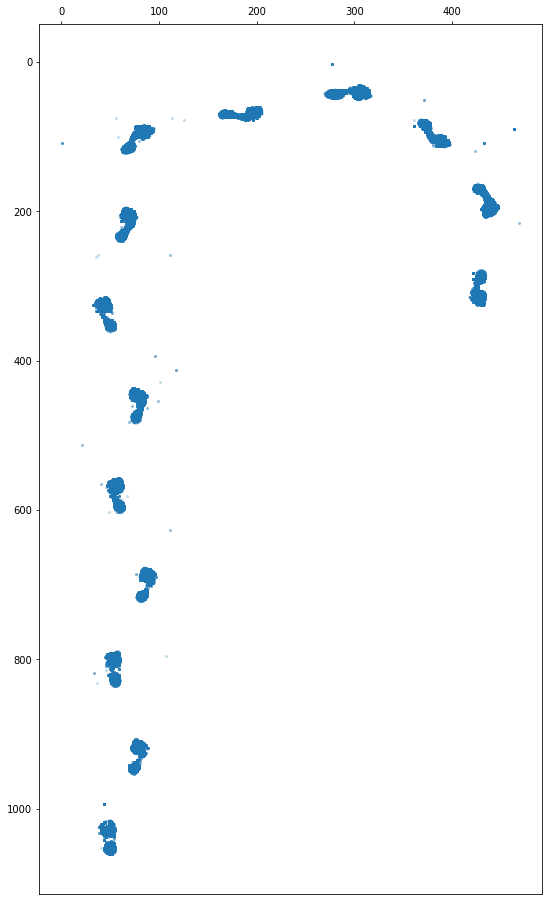

In [10]:
plt.figure(figsize=(9, 16))
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.invert_yaxis()
plt.scatter(abso_positions[:, 0], abso_positions[:, 1], alpha=0.2, s=4)

In [11]:
pd.read_excel('NP29_1_右脚.xls')

,上边界（行号）,下边界（行号）,左边界（列号）,右边界（列号）
0,1013,1063,39,57
1,904,955,67,89
2,787,837,44,62
3,674,724,75,98
4,555,605,44,66
5,435,485,67,90
6,312,363,33,57
7,192,242,54,80
8,82,124,59,97
9,58,79,159,207


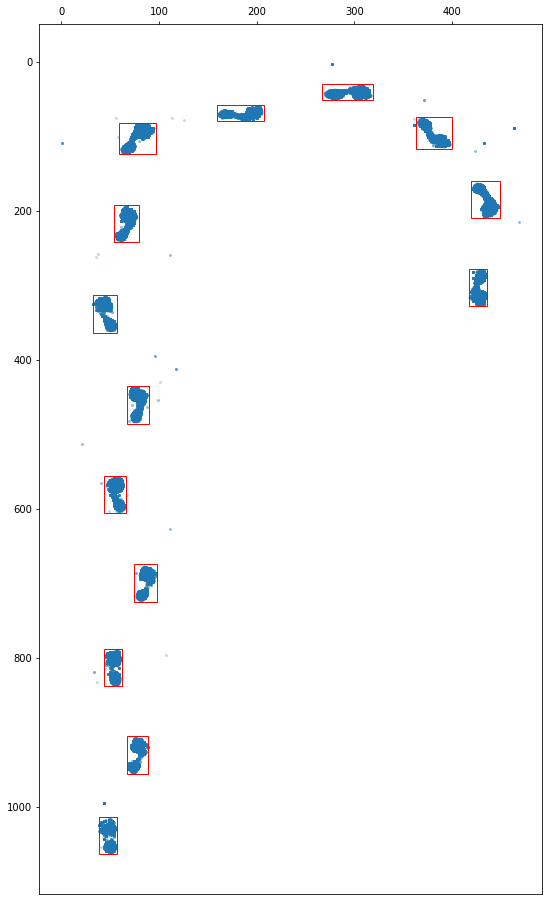

In [12]:
import matplotlib.patches as mpathes

plt.figure(figsize=(9, 16))
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.invert_yaxis()
plt.scatter(abso_positions[:, 0], abso_positions[:, 1], alpha=0.2, s=4)

right_feet = pd.read_excel('NP29_1_右脚.xls').to_numpy()
for right_foot in right_feet:
    ax.add_patch(mpathes.Rectangle([right_foot[2], right_foot[0]], right_foot[3] - right_foot[2], right_foot[1] - right_foot[0], facecolor='none', edgecolor='r'))
plt.show()

In [13]:
feet = pd.read_excel('NP29_1_右脚.xls').to_numpy()
right_feet = feet[::2]
left_feet = feet[1::2]
print(right_feet)
print(left_feet)

right_filter = []
left_filter = []
for pos in abso_positions:
    is_this_pos_right_foot = False
    is_this_pos_left_foot = False
    for right_foot in right_feet:
        if right_foot[2] <= pos[0] <= right_foot[3] and right_foot[0] <= pos[1] <= right_foot[1]:
            is_this_pos_right_foot = True
            break
    for left_foot in left_feet:
        if left_foot[2] <= pos[0] <= left_foot[3] and left_foot[0] <= pos[1] <= left_foot[1]:
            is_this_pos_left_foot = True
            break
    right_filter.append(is_this_pos_right_foot)
    left_filter.append(is_this_pos_left_foot)

right_positions = abso_positions[np.array(right_filter)]
left_positions = abso_positions[np.array(left_filter)]

[[1013 1063   39   57]
 [ 787  837   44   62]
 [ 555  605   44   66]
 [ 312  363   33   57]
 [  82  124   59   97]
 [  30   51  267  319]
 [ 160  209  419  449]]
[[904 955  67  89]
 [674 724  75  98]
 [435 485  67  90]
 [192 242  54  80]
 [ 58  79 159 207]
 [ 74 116 363 400]
 [277 327 417 436]]


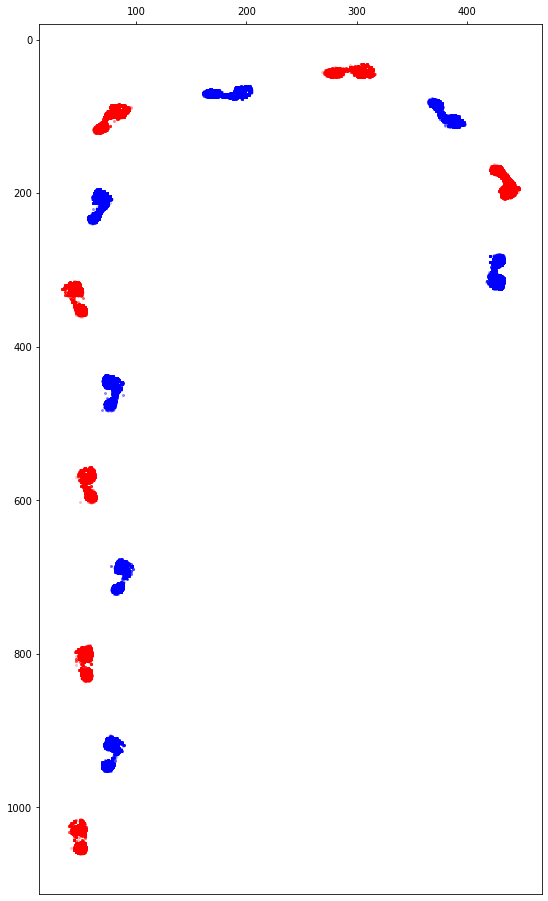

In [14]:
plt.figure(figsize=(9, 16))
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.invert_yaxis()
plt.scatter(right_positions[:, 0], right_positions[:, 1], alpha=0.2, s=4, c='red')
plt.scatter(left_positions[:, 0], left_positions[:, 1], alpha=0.2, s=4, c='blue')

In [15]:
# store right and left data
# NP0029_20150731085611

right_data = int_data[np.array(right_filter)]
left_data = int_data[np.array(left_filter)]
print(right_data)
print(left_data)

[[ 53  27  99  47  27]
 [ 53  27  95  48  38]
 [ 53  27 100  49  33]
 ...
 [758  12  86  19  42]
 [758  12  84  20  18]
 [758  12  85  20  33]]
[[109  26 107  10  28]
 [109  26 109  10  70]
 [109  26 110  10  38]
 ...
 [814  16  85   5  26]
 [814  16  85   6  31]
 [814  16  82  11  24]]


In [16]:
pd.DataFrame(right_data).to_csv('NP0029_20150731085611_左脚.csv', index=False, header=None)
pd.DataFrame(left_data).to_csv('NP0029_20150731085611_右脚.csv', index=False, header=None)

In [17]:
df = pd.DataFrame(np.column_stack((right_data[:, 0], right_data[:, -1])))\
       .groupby(by=0, as_index=False)\
       .sum()
right_sum = df.values[:, :]

df = pd.DataFrame(np.column_stack((left_data[:, 0], left_data[:, -1])))\
       .groupby(by=0, as_index=False)\
       .sum()
left_sum = df.values[:, :]

pd.DataFrame(right_sum).to_csv('NP0029_20150731085611_左脚求和.csv', index=False, header=None)
pd.DataFrame(left_sum).to_csv('NP0029_20150731085611_右脚求和.csv', index=False, header=None)

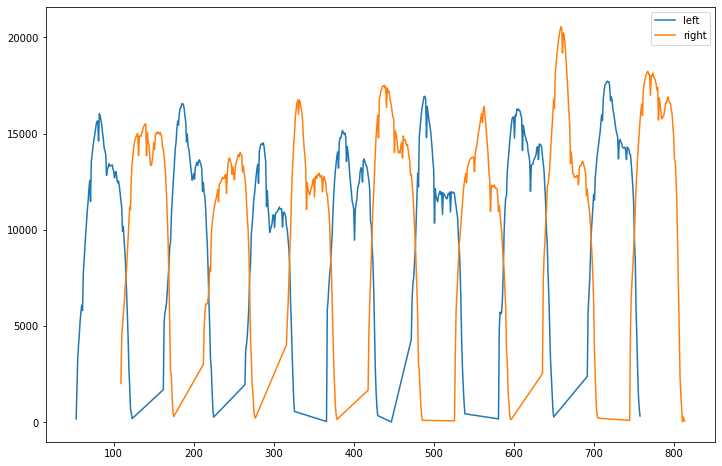

In [18]:
right_sum_without_time = right_sum[:, 1]
left_sum_without_time = left_sum[:, 1]

plt.figure(figsize=(12, 8))
l1, = plt.plot(right_sum[:, 0], right_sum_without_time)
l2, = plt.plot(left_sum[:, 0], left_sum_without_time)
plt.legend(handles=[l1, l2], labels=['left', 'right'])

/home/yzj/.virtualenvs/sci/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


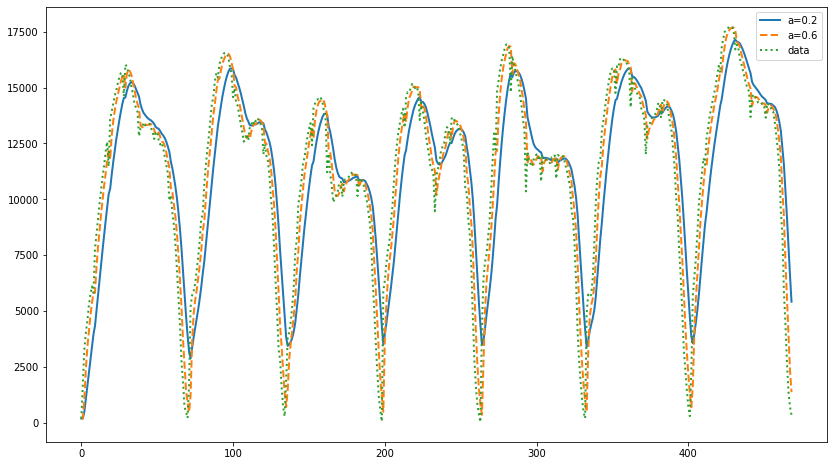

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

plt.figure(figsize=(14, 8))                        
fit1 = SimpleExpSmoothing(right_sum_without_time).fit(smoothing_level=0.2, optimized=False)
l1, = plt.plot(list(fit1.fittedvalues), linewidth=2)

fit2 = SimpleExpSmoothing(right_sum_without_time).fit(smoothing_level=0.6, optimized=False)
l2, = plt.plot(list(fit2.fittedvalues), linewidth=2, linestyle='dashed')

l3, = plt.plot(right_sum_without_time, linewidth=2, linestyle='dotted')
plt.legend(handles = [l1, l2, l3], labels = ['a=0.2', 'a=0.6', 'data'])
plt.show()

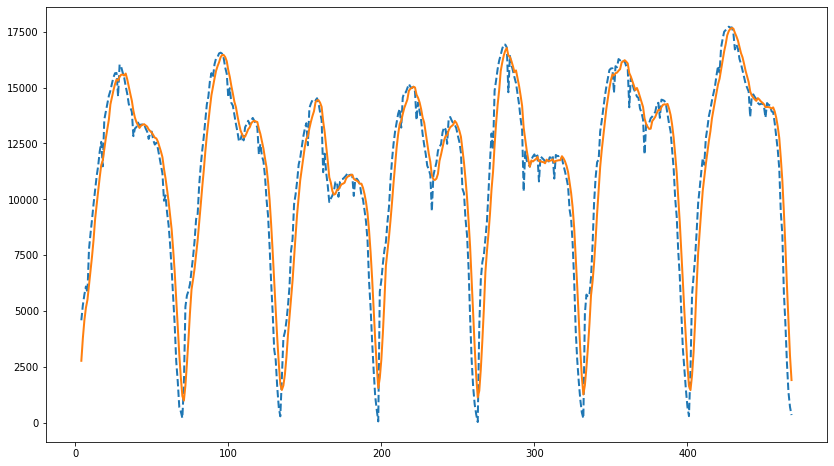

In [20]:
N = 5
n = np.ones(N)
weights = n / N
sma = np.convolve(weights, right_sum_without_time)[N-1:-N+1]
time = np.arange(N-1, len(right_sum_without_time.tolist()))
plt.figure(figsize=(14, 8))                        
plt.plot(time, right_sum_without_time[N-1:], linewidth=2, linestyle='dashed')
plt.plot(time, sma, linewidth=2)

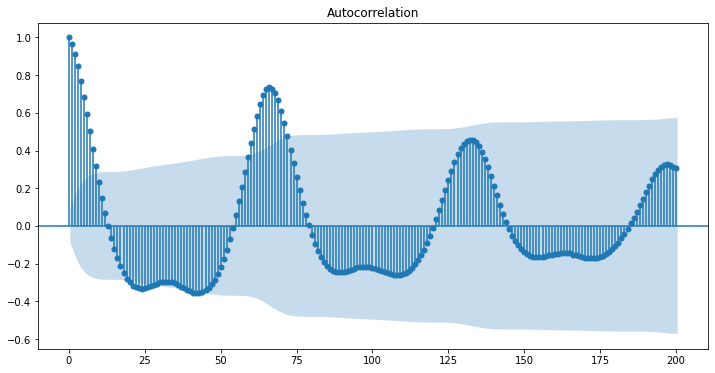

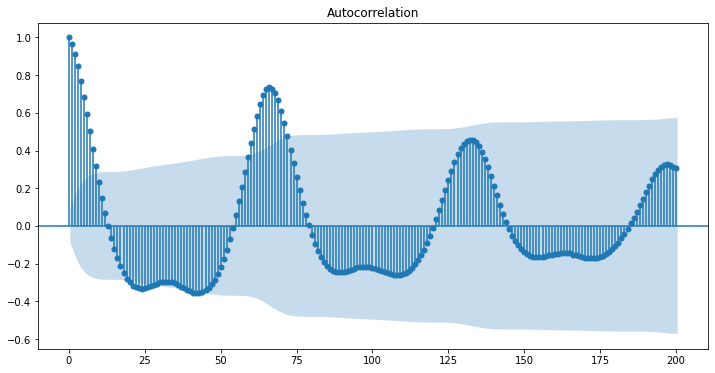

In [21]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
ax = plt.gca()
plot_acf(right_sum_without_time, lags=200, ax=ax)